In [1]:
from trainer.trainer import treeTrainer
from agent.agent import debugAgent
from env.env import debugEnv

import numpy as np
import matplotlib.pyplot as plt

pop = 20
max_gen = 200
env = debugEnv(pop, max_gen)
agent = debugAgent(actor_hiddens=[256]*4, critic_hiddens=[256]*4, actor_lr=1E-4, critic_lr=2E-3)
T = treeTrainer(env, agent, gamma=0.995)
T.agent.load("../model/check_point9.ptd")

In [10]:
T.train(10, 100)

Output()

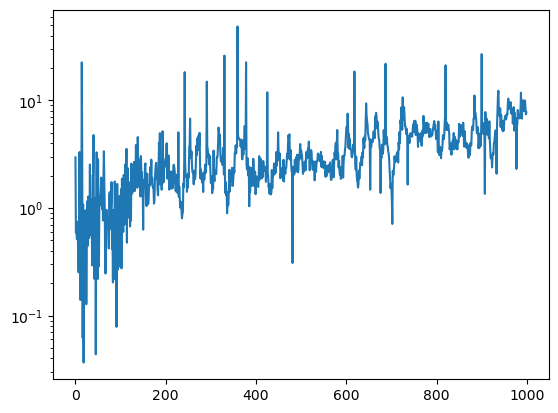

In [23]:
log = np.load("../model/log.npz")
plt.close("all")
plt.plot(log["critic_loss"])
plt.yscale("log")
plt.show()
log.close()

In [7]:
import torch
import numpy as np
ds = T.simulate()
d = ds[0]
d["td_targets"]
values = T.agent.critic(torch.from_numpy(d["obss"]).to(T.agent.device))
values = values.detach().cpu().numpy()

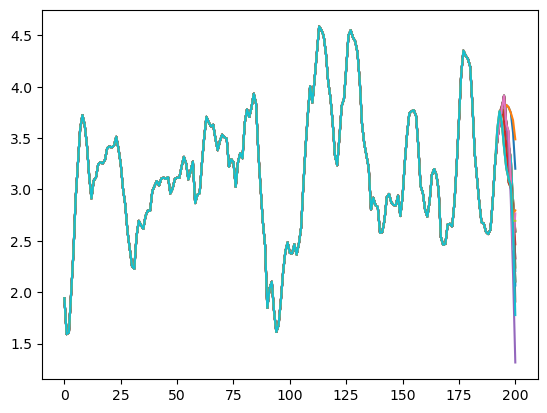

In [8]:
plt.close("all")
for d in ds:
    d2o = np.linalg.norm(d["states"][:,:3], axis=1)
    plt.plot(d2o)
plt.show()

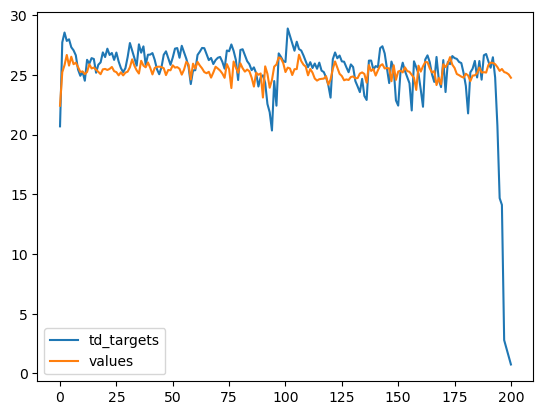

In [9]:
plt.close("all")
plt.plot(d["td_targets"], label="td_targets")
plt.plot(values, label="values")
plt.legend()
plt.show()

In [10]:
print(T.tree.root)

name:	root
state:	[-0.21019785  1.364506   -1.3647017  -0.06018382  0.0487881  -0.07106498]
obs:	[-0.21019785  1.364506   -1.3647017  -0.06018382  0.0487881  -0.07106498]
action:	[0. 0. 0.]
reward:	0.0
done:	False
td_target:	20.683206854894053
regret:	0.0
value:	0.0

